In [6]:
from tensorboard.backend.event_processing import event_accumulator
from matplotlib import pyplot as plt
import pandas as pd

Takes the event data from a TensorBoard log, puts it into a pandas dataframe, and then plots the data.

In [7]:
PATH = '../../runs/textseg/NLWiki_15-06_16-24/'
RUN_NAME = 'textseg/NLWiki_Jun15_1624'

In [8]:
e = event_accumulator.EventAccumulator(PATH, size_guidance={event_accumulator.SCALARS: 0})
e.Reload()
tags = e.Tags()['scalars']

In [9]:
df = pd.DataFrame(columns=tags)
for tag in tags:
    for scalar in e.Scalars(tag):
        df.loc[scalar.step, tag] = scalar.value
df.to_csv(f'../../results/{RUN_NAME}.csv', index=False)

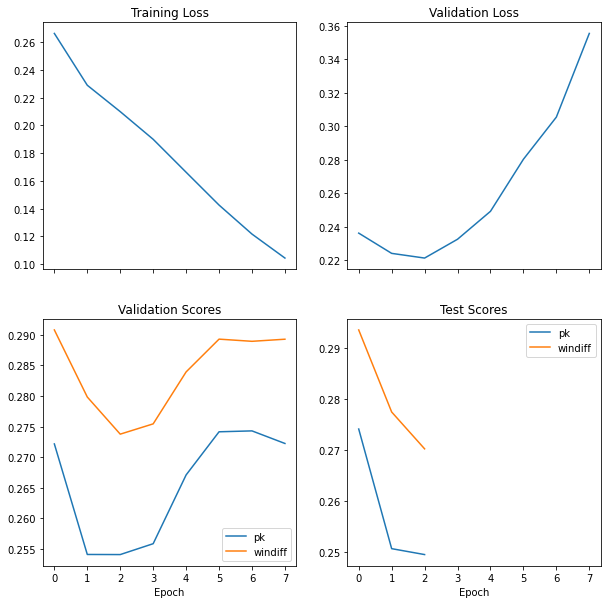

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs[0, 0].plot(df['Loss/train'])
axs[0, 0].set_title('Training Loss')

axs[0, 1].plot(df['Loss/val'])
axs[0, 1].set_title('Validation Loss')

axs[1, 0].plot(df['pk_score/val'], label='pk')
axs[1, 0].plot(df['wd_score/val'], label='windiff')
axs[1, 0].set_title('Validation Scores')
axs[1, 0].legend()
axs[1, 0].set_xlabel('Epoch')

axs[1, 1].plot(df['pk_score/test'], label='pk')
axs[1, 1].plot(df['wd_score/test'], label='windiff')
axs[1, 1].set_title('Test Scores')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Epoch')

plt.savefig(f'../../results/{RUN_NAME}.png')
plt.show()